In [49]:
import pandas as pd
import numpy as np
import nltk
nltk.download ("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\Murtuja
[nltk_data]     afshar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
df = pd.read_csv(r"C:\Users\Murtuja afshar\OneDrive\Desktop\job\task 3\amazon_review.csv\amazon_review.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [51]:
#dropping na
df = df.dropna(subset = ['reviewText'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4914 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4914 non-null   object 
 1   asin            4914 non-null   object 
 2   reviewerName    4913 non-null   object 
 3   helpful         4914 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4914 non-null   float64
 6   summary         4914 non-null   object 
 7   unixReviewTime  4914 non-null   int64  
 8   reviewTime      4914 non-null   object 
 9   day_diff        4914 non-null   int64  
 10  helpful_yes     4914 non-null   int64  
 11  total_vote      4914 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 499.1+ KB


In [52]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Murtuja
[nltk_data]     afshar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Murtuja
[nltk_data]     afshar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
stop_words = set(stopwords.words('english'))

#lowercase, URLS, remove special characters
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\s+|www\s+|https\s+", '', text, flags = re.MULTILINE)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [54]:
df['cleaned_review'] = df['reviewText'].apply(clean_text)
df[['reviewText','cleaned_review']].head()

,reviewText,cleaned_review
0,No issues.,issues
1,"Purchased this for my device, it worked as adv...",purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,works expected sprung higher capacity think ma...
3,This think has worked out great.Had a diff. br...,think worked greathad diff bran 64gb card went...
4,"Bought it with Retail Packaging, arrived legit...",bought retail packaging arrived legit orange e...


In [55]:
#sentiment analysis using Vader


sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']
    
    if compound >= 0.05:
        sentiment = 'Positive'
    elif compound <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return pd.Series([compound, sentiment])

#apply to reviews

df[['compund_score', 'sentiment']] = df['cleaned_review'].apply(get_sentiment)
df[['reviewText','cleaned_review','compund_score','sentiment']].head()

,reviewText,cleaned_review,compund_score,sentiment
0,No issues.,issues,0.0000,Neutral
1,"Purchased this for my device, it worked as adv...",purchased device worked advertised never much ...,0.0000,Neutral
2,it works as expected. I should have sprung for...,works expected sprung higher capacity think ma...,0.4019,Positive
3,This think has worked out great.Had a diff. br...,think worked greathad diff bran 64gb card went...,0.6486,Positive
4,"Bought it with Retail Packaging, arrived legit...",bought retail packaging arrived legit orange e...,0.8591,Positive


In [56]:
df['sentiment'].value_counts()

Positive    3898
Negative     639
Neutral      377
Name: sentiment, dtype: int64

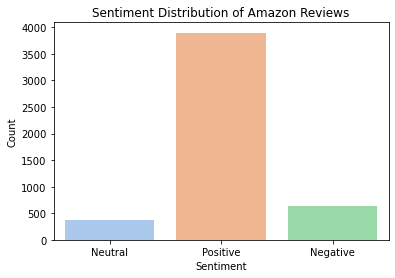

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution of Amazon Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

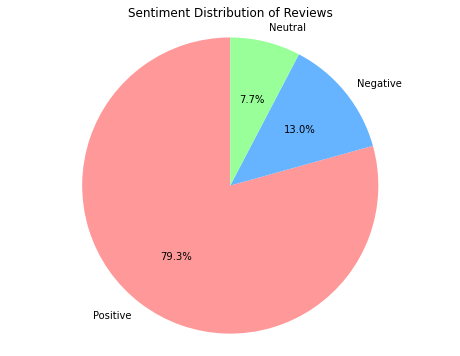

In [59]:
sentiment_counts = df['sentiment'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

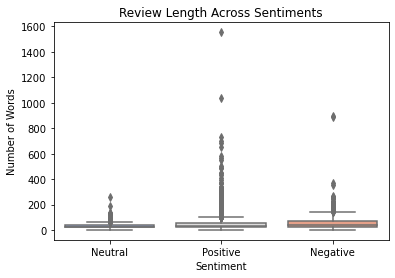

In [60]:
df['review_length'] = df['reviewText'].apply(lambda x: len(str(x).split()))
sns.boxplot(data=df, x='sentiment', y='review_length', palette='coolwarm')
plt.title('Review Length Across Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()